In [1]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pca


In [2]:
plt.rcParams["figure.figsize"] = (10,5)

In [3]:
dataset= pd.read_csv("dataset.csv")
first = True

for col in dataset.columns:
    if first:
        first = False
        continue

    dataset[col] = dataset[col].apply(lambda x: x.replace(",", "."))
    dataset[col] = dataset[col].astype(float)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [4]:
dataset_wo_date = dataset.drop("date", axis=1)

In [7]:
# centering and scaling
centered_df = dataset_wo_date - dataset_wo_date.mean()
scaler = StandardScaler()
scaled_df = scaler.fit_transform(centered_df)
scaled_df = pd.DataFrame(scaled_df, columns=dataset_wo_date.columns)

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

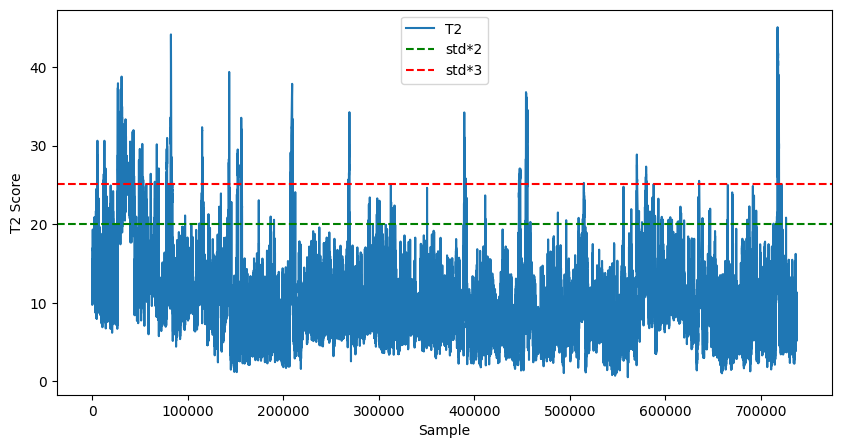

In [9]:
PCA_NUM = 16

model = pca.pca()
out = model.fit_transform(scaled_df, verbose=0)

outliers_hot = pca.hotellingsT2(model.results['PC'].values[:,:PCA_NUM], verbose=0)
scores_t2 = outliers_hot[0]["y_score"]
mean_t2 = scores_t2.mean()
std_t2 = scores_t2.std()
plt.plot(scores_t2, label="T2")
plt.axhline(mean_t2 + 2*std_t2, color='g', linestyle='--', label='std*2')
plt.axhline(mean_t2 + 3*std_t2, color='r', linestyle='--', label='std*3')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('T2 Score')
plt.title('Using T2 to visualize possible outliers')
plt.show()

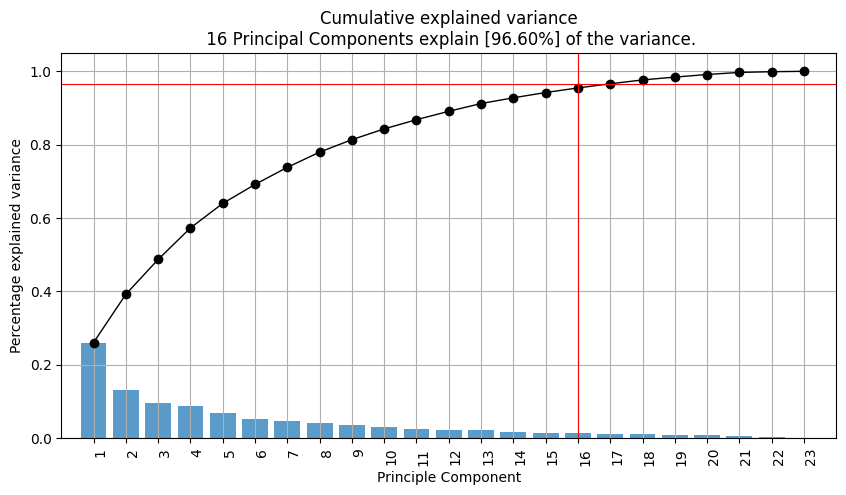

In [20]:
fig, ax = plt.subplots()
model.plot(fig=fig,ax=ax)
plt.show()

[scatterd] >INFO> Create scatterplot


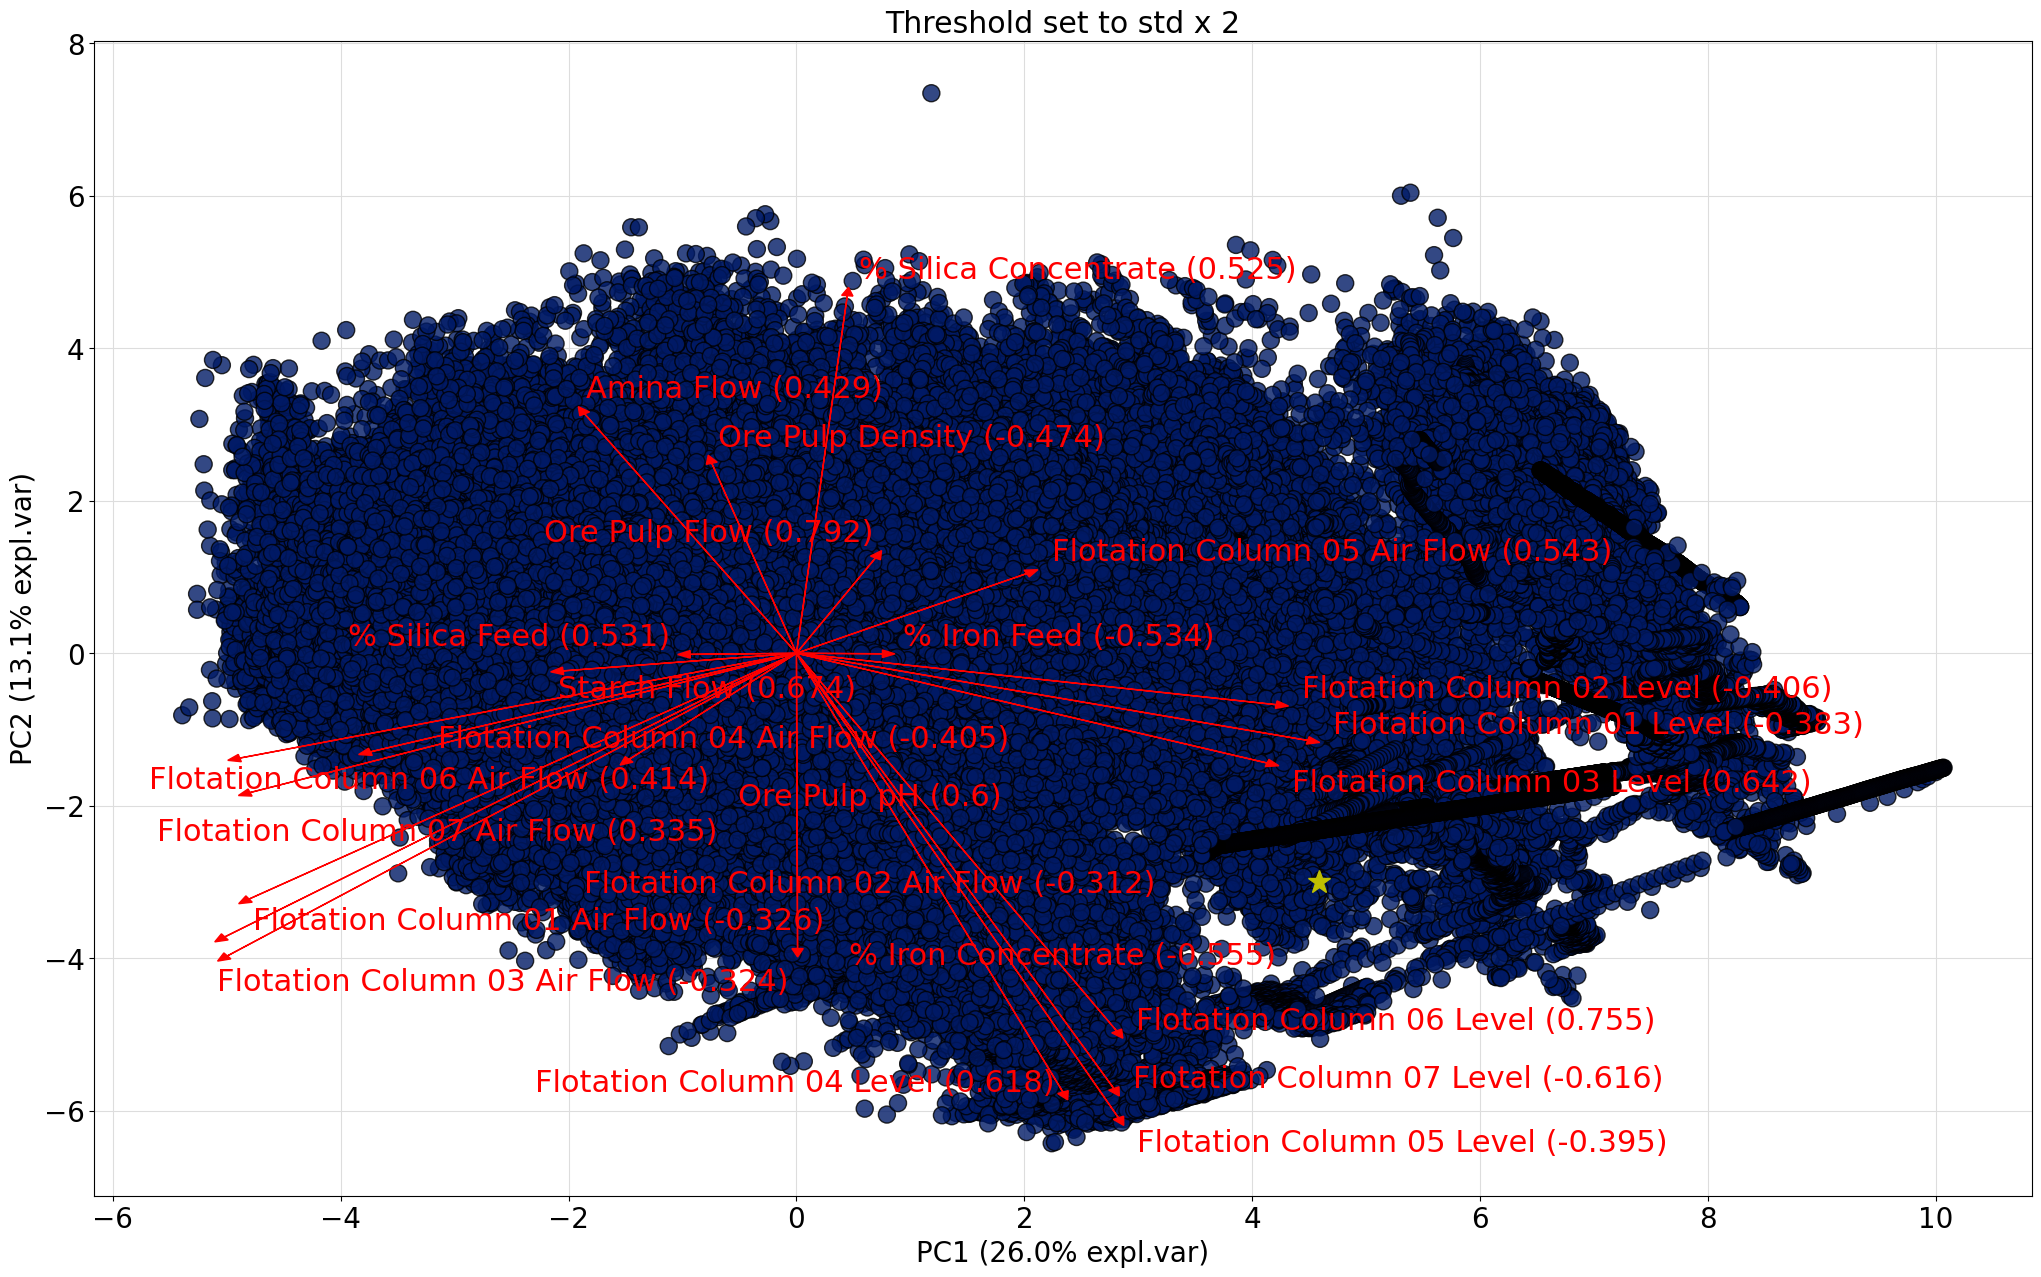

In [ ]:
arrowdict = {
'fontsize': 22,
'color_text': "red",
'weight': None,
'alpha': 1,
'color_strong': 'red',
'color_weak': 'red',
'scale_factor': None
}

# RAM eater
#for std_multiplier in [2, 3]:
#    fig, ax = model.biplot(verbose=0, arrowdict=arrowdict)
#    out_t2 = scores_t2[scores_t2 > mean_t2 + std_t2*std_multiplier]
#    x_t2 = []
#    y_t2 = []
#    for i in range(len(out_t2)):
#        index = out_t2.index[i]
#        pcs = model.results['PC'].iloc[index]
#        x_t2.append(pcs.iloc[0])
#        y_t2.append(pcs.iloc[1])
#        ax.set_title(f"Threshold set to std x {std_multiplier}")
#        ax.plot(x_t2, y_t2, 'y*', zorder=100, markersize=17)
#        plt.show()